In [160]:
#import relevant libraries
import os
from scipy import stats

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dabest
import NLCLIMB
import NLMATH
import itertools
from datetime import datetime
date = datetime.today().strftime('%Y%m%d')
from statistics import mean
from textwrap import wrap

import dabest_jck
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout

#NOTE: SUPPRESSES WARNINGS!

import warnings


warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
#initial file processing
computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
homecomp = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"
openPath = computer1 + filedir
files = os.listdir(openPath)

#identifying genotypes
responder = "ACR"
respondercsv = responder + ".csv"
wt = "w1118"

In [3]:
lst=[]


for file_no in os.listdir(openPath): 
    if respondercsv in file_no and "w1118" not in file_no :   #wt > acr files
        f = os.path.join(openPath, file_no)
        dfe=pd.read_csv(f)
        exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
        driver = file_no.split(" ")[0]
        lst.append(driver)

In [5]:
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

# run if new data

In [7]:
def fivesecondrule(dfexpt):
    number = 20.0
    fivesecondsdark = dfexpt[(dfexpt['ExperimentState']== 'Dark')][dfexpt[(dfexpt['ExperimentState']== 'Dark')]['Seconds'].between(3.0, float(3.0+number), inclusive = "both")]
    fivesecondsfull = dfexpt[(dfexpt['ExperimentState']== 'Full')][dfexpt[(dfexpt['ExperimentState']== 'Full')]['Seconds'].between(26.0, float(26.0+number), inclusive = "both")]
    fivesecondsrecovery = dfexpt[(dfexpt['ExperimentState']== 'Recovery')][dfexpt[(dfexpt['ExperimentState']== 'Recovery')]['Seconds'].between(46.0, float(46.0+number), inclusive = "both")]

    fiveseconddfs = pd.concat([fivesecondsdark, fivesecondsfull, fivesecondsrecovery]).reset_index(drop=True)

    return fiveseconddfs

In [6]:
# angular change
# lst = ['MB011B']
# driver = "MB011B"
# transgenic = driver + " x " + responder
# filename = openPath + transgenic + ".csv"
# filenamewt = openPath + wt+"_"+ transgenic + ".csv"

# dfe=pd.read_csv(filename)
# dfw= pd.read_csv(filenamewt)
# exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
# wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

# #adjust this depending on timeframe
# dfexpt = fivesecondrule(NLCLIMB.generation(exptdf, driver))

# import math
 
# def get_angle(x1,y1,x2,y2):
#     return math.degrees(math.atan2(y2-y1, x2-x1))

# xycoo = dfexpt.filter(regex = "X.*|Y.*")
# rety = xycoo.iloc[:, 0:4]
# angledf = pd.DataFrame()

# for n in list(range(0, len(rety.columns),2)):
#     df5 = pd.DataFrame()
#     singlecol = rety.iloc[:,n]
#     singlelst = []
#     for nn in list(range(len(singlecol)-1)):
#         x1 = rety.iloc[nn,n]
#         x2 = rety.iloc[nn+1,n]
#         y1 = rety.iloc[nn,n+1]
#         y2 = rety.iloc[nn+1,n+1]
#         angle = get_angle(x1,y1,x2,y2)
#         singlelst.append(angle)
#     df5[singlecol.name]= singlelst
#     angledf = pd.concat([angledf, df5.reset_index(drop=True) ])
    
# print(angledf)


In [8]:
dflists = ['df_bspeed', 'df_speed', 'df_time', 'df_fall','df_height', 'df_displacement', 'df_meanpause', 'df_pause','df_meanbout', 'df_bout','df_boutpos', 'df_pausepos','df_maxvelocity','df_straightindex', 'df_displacementbetweenpause']
    
dflists2 = [s.replace('df_', 'dfreg_') for s in dflists]

for j in dflists2:
    globals()[j]=pd.DataFrame()
    
diff = pd.DataFrame()
diffbs = pd.DataFrame()

for n in lst:
    driver = n
    transgenic = driver + " x " + responder
    filename = openPath + transgenic + ".csv"
    filenamewt = openPath + wt+"_"+ transgenic + ".csv"

    dfe=pd.read_csv(filename)
    dfw= pd.read_csv(filenamewt)

    exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
    wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

    #adjust this depending on timeframe
    dfexpt = fivesecondrule(NLCLIMB.generation(exptdf, driver))
    dfwt = fivesecondrule(NLCLIMB.generation(wtdf, wt))
        
    
    df_sp = NLMATH.ospeed(dfwt, dfexpt).reset_index(drop=True)
    df_bsp = NLMATH.bspeed(NLMATH.boutspeed(dfexpt), NLMATH.boutspeed(dfwt)).reset_index(drop=True)
    df_t = NLMATH.timetype(dfwt, dfexpt).reset_index(drop=True)
    df_f = NLMATH.fallingocc(dfexpt, dfwt).reset_index(drop=True)
    df_h = NLMATH.totalheight(dfexpt, dfwt).reset_index(drop=True)
    df_d = pd.concat([NLMATH.totaldisp(dfexpt, "Expt"), NLMATH.totaldisp(dfwt, "WT")]).reset_index(drop=True)
    df_bp = NLMATH.bheight(NLMATH.boutheight(dfexpt), NLMATH.boutheight(dfwt)).reset_index(drop=True)
    df_pp = NLMATH.bheight(NLMATH.pauseheight(dfexpt), NLMATH.pauseheight(dfwt)).reset_index(drop=True)
    
    #newadditions
    df_dispp = pd.concat([NLMATH.displacementbetweenpauses(dfexpt, "Expt"), NLMATH.displacementbetweenpauses(dfwt, "WT")], axis = 0).reset_index(drop=False)
    df_maxv = pd.concat([NLMATH.maxvelocity(dfexpt, "Expt"), NLMATH.maxvelocity(dfwt, "WT")], axis = 0).reset_index(drop=False)
    df_sim = pd.concat([NLMATH.straightnessindexmeter(dfexpt, "Expt"), NLMATH.straightnessindexmeter(dfwt, "WT")], axis = 0).reset_index(drop=True)
    
    #pause and bouts
    wttotalmeanevent, wttotalnumberevent = NLMATH.pausecomp(dfwt, wt)
    expttotalmeanevent, expttotalnumberevent = NLMATH.pausecomp(dfexpt, driver)
        
    alltgtmeandf_pause = pd.concat([NLMATH.pausenumber(wttotalmeanevent, n, "Pauses"), NLMATH.pausenumber(expttotalmeanevent, n, "Pauses")], axis = 0).reset_index(drop=True)
    alltgtmeandf_bout = pd.concat([NLMATH.pausenumber(wttotalmeanevent, n, "Bouts"), NLMATH.pausenumber(expttotalmeanevent, n, "Bouts")], axis = 0).reset_index(drop=True)
    
    alltgtnumberdf_pause = pd.concat([NLMATH.pausenumber(wttotalnumberevent, n, "Pauses"), NLMATH.pausenumber(expttotalnumberevent, n, "Pauses")], axis = 0).reset_index(drop=True)
    alltgtnumberdf_bout = pd.concat([NLMATH.pausenumber(wttotalnumberevent, n, "Bouts"), NLMATH.pausenumber(expttotalnumberevent, n, "Bouts")], axis = 0).reset_index(drop=True)
            
    #deltaG plots
    dfs2 = NLMATH.deltaversion(df_sp, n, "Velocity")
    dft2 = NLMATH.deltaversion(df_t, n, "Time")
    dff2 = NLMATH.deltaversion(df_f, n, "Fall")
    dfh2 = NLMATH.deltaversion(df_h, n, "Y")
    dfd2 = NLMATH.deltaversion(df_d, n, "displacement")
    dfbs2 = NLMATH.deltaversion(df_bsp, n, "BSpeed")
    dfbp2 = NLMATH.deltaversion(df_bp, n, "Height")
    dfpp2 = NLMATH.deltaversion(df_pp, n, "Height")
    
    #new additions
    dfdbp2 = NLMATH.deltaversion(df_dispp, n, "avgdisplacementbetweenpause")
    dfmv2 = NLMATH.deltaversion(df_maxv, n, "maxvelocity")
    dfsim2 = NLMATH.deltaversion(df_sim, n, "averagestraightnessindex")
    
    #pause and bouts
    dfmp2 = NLMATH.deltaversion(alltgtmeandf_pause, n, "Pauses")
    dfmb2 = NLMATH.deltaversion(alltgtmeandf_bout, n, "Bouts")     
    dfnp2 = NLMATH.deltaversion(alltgtnumberdf_pause, n, "Pauses")
    dfnb2 = NLMATH.deltaversion(alltgtnumberdf_bout, n, "Bouts")
    

    #regressiondfs
    dfreg_speed = pd.concat([dfreg_speed, dfs2], axis = 0).reset_index(drop=True)
    dfreg_time = pd.concat([dfreg_time, dft2], axis = 0).reset_index(drop=True)
    dfreg_fall = pd.concat([dfreg_fall, dff2], axis = 0).reset_index(drop=True)
    dfreg_height = pd.concat([dfreg_height, dfh2], axis = 0).reset_index(drop=True)
    dfreg_displacement = pd.concat([dfreg_displacement, dfd2], axis = 0).reset_index(drop=True)
    dfreg_bspeed = pd.concat([dfreg_bspeed, dfbs2], axis = 0).reset_index(drop=True)
    dfreg_boutpos = pd.concat([dfreg_boutpos, dfbp2], axis = 0).reset_index(drop=True)
    dfreg_pausepos = pd.concat([dfreg_pausepos, dfpp2], axis = 0).reset_index(drop=True)
    
    dfreg_pause = pd.concat([dfreg_pause, dfnp2], axis = 0).reset_index(drop=True)
    dfreg_meanpause = pd.concat([dfreg_meanpause, dfmp2], axis = 0).reset_index(drop=True)
    dfreg_bout = pd.concat([dfreg_bout, dfnb2], axis = 0).reset_index(drop=True)
    dfreg_meanbout = pd.concat([dfreg_meanbout, dfmb2], axis = 0).reset_index(drop=True)
    
    dfreg_displacementbetweenpause = pd.concat([dfreg_displacementbetweenpause, dfdbp2], axis = 0).reset_index(drop=True)
    dfreg_maxvelocity = pd.concat([dfreg_maxvelocity, dfmv2], axis = 0).reset_index(drop=True)
    dfreg_straightindex = pd.concat([dfreg_straightindex, dfsim2], axis = 0).reset_index(drop=True)
    
    #arranging based on SPEED values
    
    df6 = df_sp[(df_sp['ExperimentState'] != "Recovery") ]       
    name = []
    if any(df6["Velocity"].isnull()):
        name = df6[df6["Velocity"].isnull()]['index'].tolist()
    dfsp_db = df6[~df6['index'].isin(name)]
        
    dfsp_db2 = dabest_jck.load(data = dfsp_db, x = ["ExperimentState", "Type"], y = "Velocity",  delta2 = True, experiment = "Type",
                            experiment_label = ['WT', 'Expt'], x1_level = ["Dark", "Full"], paired = "baseline", id_col="index" ) #if delta2 = dabest; deltaG = dabest_jck
    dfstatstest = dfsp_db2.delta_g.statistical_tests 
    diff2 = pd.DataFrame(data = round(dfsp_db2.delta_g.delta_delta.difference,3), columns = ['delta_g'], index = [n])
    diff = pd.concat([diff, diff2])

In [ ]:
#special instance
# diff = diff.set_axis(pd.MultiIndex.from_arrays([diff.columns,
#                                         diff.groupby(level=0, axis=1).cumcount()
#                                        ]), axis=1)
# diff = diff.stack(level = 1)
# diff = diff.droplevel(1)

# #SPEED: sorting lists, arranging in ascending order

diff_sorted=diff.sort_values(by = "delta_g", ascending=True)
sortedindex = diff_sorted.index.tolist()
dblist= pd.DataFrame()
dblist['MBON'] = sortedindex

In [ ]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [ ]:
df2list = [eval(xi) for xi in dflists2]

for nn in df2list:
    nn.set_index("MBON", inplace = True)
    nn.to_csv(openPath + "Compilation with delta\\fivesecondrule\\" + responder + " " + get_df_name(nn) + " .csv")

pdlist = pd.DataFrame(dblist)
pdlist.to_csv(openPath + "Compilation with delta\\fivesecondrule\\" + responder + " " + "dblist .csv")

# run if old files

In [6]:
def generating_heatmapdf(secondrule, responder):
    
    newfile2 = openPath + "Compilation with delta\\" + secondrule + "secondrule\\"
    files2 = os.listdir(newfile2)

    for yy in files2:
        if responder in yy:
            name2 = yy.split(" ")[1]
            newfile2read = pd.read_csv(newfile2 + yy)
            globals()[name2] = (newfile2read.set_index("MBON"))
    
    dfreg2 = pd.DataFrame()
    for n in list(dblist.index):
        dfreg = pd.DataFrame()
        dfreg["Bout speed"] = dfreg_bspeed[dfreg_bspeed.index == n]['delta_g']
        dfreg["Speed"] = dfreg_speed[dfreg_speed.index == n]['delta_g']
        dfreg["Fall #"] = dfreg_fall[dfreg_fall.index == n]['delta_g']
        dfreg["Height"] = dfreg_height[dfreg_height.index == n]['delta_g']
        dfreg["Time to reach 3/4 chamber"] = dfreg_time[dfreg_time.index == n]['delta_g']
        # dfreg["Mean\n Pause"] = dfreg_meanpause[dfreg_meanpause.index == n]['delta_g']
        # dfreg["Pause #"] = dfreg_pause[dfreg_pause.index == n]['delta_g']
        dfreg["Mean Bout"] = dfreg_meanbout[dfreg_meanbout.index == n]['delta_g']
        dfreg["Bout #"] = dfreg_bout[dfreg_bout.index == n]['delta_g']
        dfreg["Bout position"] = dfreg_boutpos[dfreg_boutpos.index == n]['delta_g']
        # dfreg["Pause\n position"] = dfreg_pausepos[dfreg_pausepos.index == n]['delta_g']
        #new features
        dfreg["Max velocity"] = dfreg_maxvelocity[dfreg_maxvelocity.index == n]['delta_g']
        dfreg["Avg Straightness index"] = dfreg_straightindex[dfreg_straightindex.index == n]['delta_g']
        dfreg["displacement between pause"] = dfreg_displacementbetweenpause[dfreg_displacementbetweenpause.index == n]['delta_g']
        dfreg['MBON'] = n
        dfreg2 = pd.concat([dfreg2, dfreg], axis = 0).reset_index(drop=True)
        
    return dfreg2


In [7]:
def find_number(df, lookup_value, genre):
    lobe_values = []
    for _, row in df.iterrows():
        # Splitting the 'MBON' values and removing any potential whitespace
        mbon_values = [x.strip() for x in row['MBON names'].split(',')]
        if lookup_value in mbon_values:
            lobe_values.append(row[genre])
            
    lobelobe = list(set(lobe_values))
    return ', '.join(lobelobe)

## line plot for binning data

In [8]:
def generating_heatmapdf(secondrule, responder):
    
    newfile2 = openPath + "Compilation with delta\\" + secondrule + "secondrule\\"
    files2 = os.listdir(newfile2)

    for yy in files2:
        if responder in yy:
            name2 = yy.split(" ")[1]
            newfile2read = pd.read_csv(newfile2 + yy)
            globals()[name2] = (newfile2read.set_index("MBON"))
    
    dfreg2 = pd.DataFrame()
    for n in list(dblist.index):
        dfreg = pd.DataFrame()
        dfreg["Bout speed"] = dfreg_bspeed[dfreg_bspeed.index == n]['delta_g']
        dfreg["Speed"] = dfreg_speed[dfreg_speed.index == n]['delta_g']
        dfreg["Fall #"] = dfreg_fall[dfreg_fall.index == n]['delta_g']
        dfreg["Avg Height Climbed"] = dfreg_height[dfreg_height.index == n]['delta_g']
        # dfreg["Time to reach 3/4 chamber"] = dfreg_time[dfreg_time.index == n]['delta_g']
        # dfreg["Mean\n Pause"] = dfreg_meanpause[dfreg_meanpause.index == n]['delta_g']
        # dfreg["Pause #"] = dfreg_pause[dfreg_pause.index == n]['delta_g']
        dfreg["Avg Bout Time"] = dfreg_meanbout[dfreg_meanbout.index == n]['delta_g']
        dfreg["Bout #"] = dfreg_bout[dfreg_bout.index == n]['delta_g']
        # dfreg["Bout position"] = dfreg_boutpos[dfreg_boutpos.index == n]['delta_g']
        # dfreg["Pause\n position"] = dfreg_pausepos[dfreg_pausepos.index == n]['delta_g']
        #new features
        dfreg["Max velocity"] = dfreg_maxvelocity[dfreg_maxvelocity.index == n]['delta_g']
        dfreg["Avg Straightness index"] = dfreg_straightindex[dfreg_straightindex.index == n]['delta_g']
        dfreg["displacement between pause"] = dfreg_displacementbetweenpause[dfreg_displacementbetweenpause.index == n]['delta_g']
        dfreg['MBON'] = n
        dfreg['responder'] = n + "_" + responder
        dfreg2 = pd.concat([dfreg2, dfreg], axis = 0).reset_index(drop=True)
        
    return dfreg2

def matchingdfs (df, matchingset):
    newdf_a = pd.DataFrame()
    for n in matchingset:
        df_a=pd.DataFrame()
        df_a = df[(df['MBON'] == n)]
        newdf_a = pd.concat([newdf_a, df_a]).reset_index(drop=True)
    return newdf_a

In [9]:
# dfreg_5seconds = generating_heatmapdf("five").sort_values('MBON').reset_index(drop=True)
dfreg_ACR = generating_heatmapdf("twenty", "ACR").sort_values('MBON').reset_index(drop=True)
dfreg_Cr2 = generating_heatmapdf("twenty", "Chrimson2").sort_values('MBON').reset_index(drop=True)

In [10]:
matchingset = list(set(dfreg_ACR['MBON']) & set(dfreg_Cr2['MBON']))

#matchingset = ['MB082C', 'MB242A','MB011B', 'VT999036', 'SS81521', 'SS81353']

dfreg_a = matchingdfs(dfreg_ACR, matchingset)
dfreg_c = matchingdfs(dfreg_Cr2, matchingset)

dfreg_resp = pd.concat([dfreg_a, dfreg_c])

dfreg_resp = dfreg_resp.sort_values(by = "responder", ascending=True).reset_index(drop=True)

## heatmap with differences

Text(0.4, 1.0, 'Plot of MBONs and their Δg across locomotor reactivity parameters')

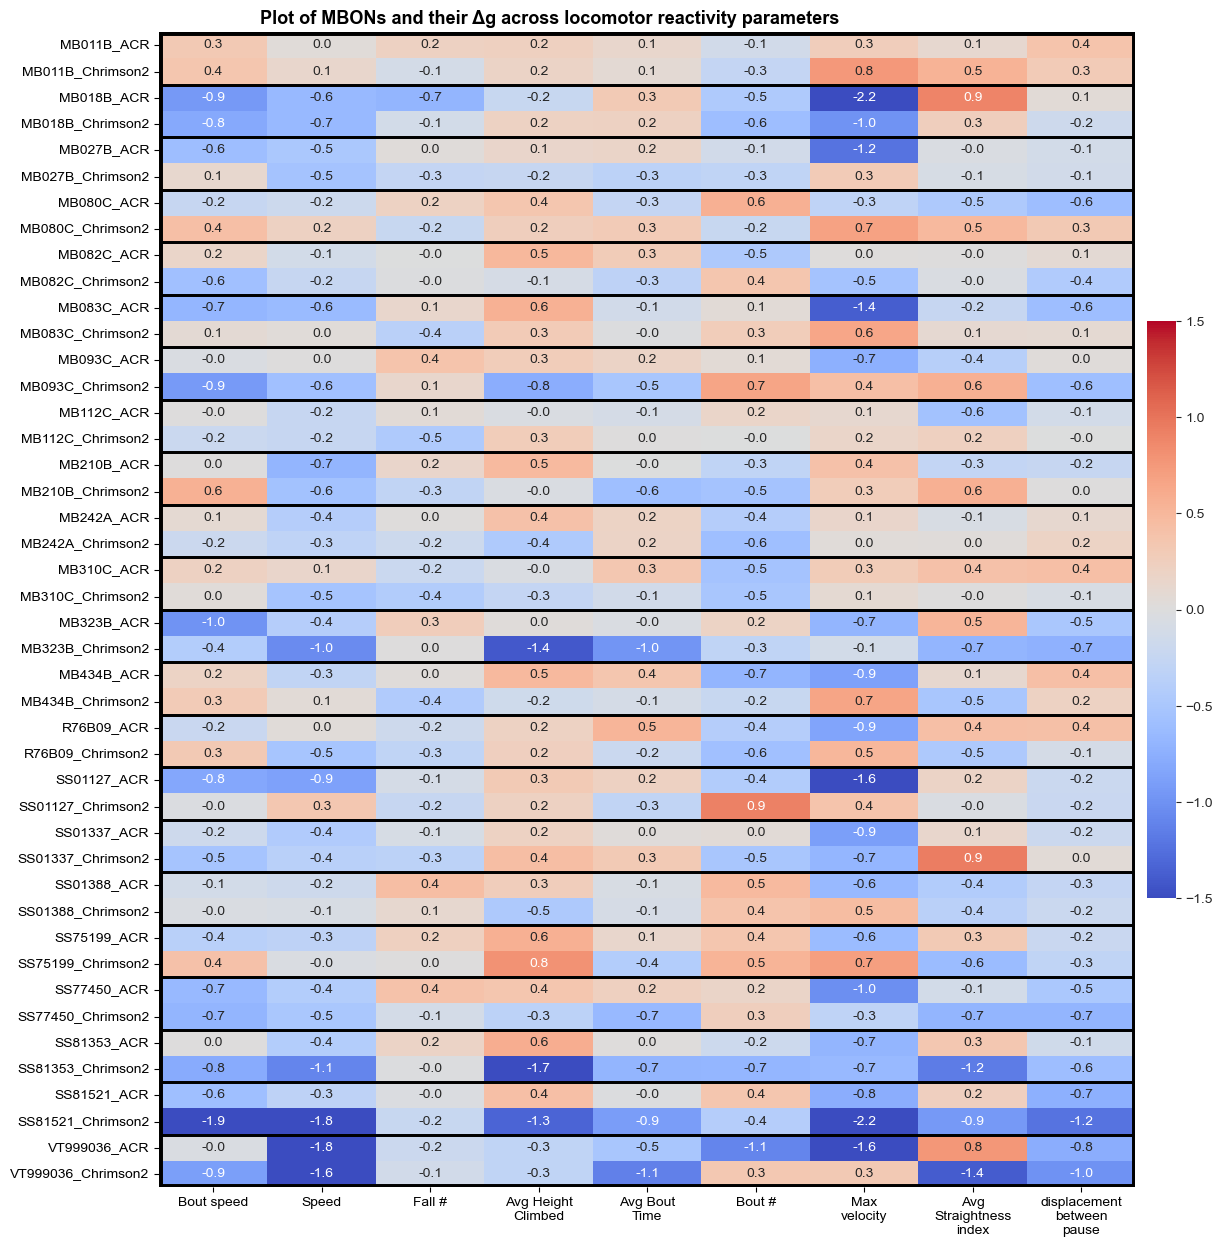

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df00 = dfreg_resp.copy()
df50 = df00.set_index(['responder'])
df50 = df50.drop(['MBON'], axis =1)
fig1, ax3 = plt.subplots(figsize=(15, 15))     

sns.set_style("whitegrid", {'axes.grid' : False})           
j7 = sns.heatmap(df50, ax = ax3, annot=True, fmt=".1f", vmin = -1.5, vmax = 1.5, cmap='coolwarm', linewidths=0.0, edgecolor = "none"
                 , clip_on=False, cbar_kws={"shrink": 0.5, "pad": 0.01}) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01 #cbar_kws = dict(orientation = "vertical")
j7.set_ylabel('')
j7.set_yticklabels(j7.get_yticklabels(), va='center', rotation = 0, fontsize = 10)
j7.set_xticklabels(j7.get_xticklabels(), rotation = 0, fontsize = 10)

wrap_labels(j7, 10)

from matplotlib.patches import Rectangle

for i in list(range(0,46,2)):
    ax3.add_patch(Rectangle((0, i), 9, 2, fill=False, edgecolor='black', lw=2))

# Drawing the frame 
j7.axhline(y = 0, color = 'k',  
            linewidth = 5) 
  
j7.axhline(y = 44, color = 'k', 
            linewidth = 5) 
  
j7.axvline(x = 0, color = 'k', 
            linewidth = 5) 
  
j7.axvline(x = 9, color = 'k', 
            linewidth = 5) 

j7.set_title('Plot of MBONs and their Δg across locomotor reactivity parameters', x=0.4, weight='bold', fontsize =13 )

# #fig1.tight_layout()

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_deltagheatmapwithlobelocations_forfirst10s.png", dpi = 1200)

## differenced heatmap

In [11]:
effectsizediff = pd.DataFrame()
for n in matchingset:
    newt = dfreg_resp[dfreg_resp['MBON'] == n]
    MBONlabel = pd.DataFrame()
    MBONlabel['responder'] = [n]
    newtdiff = newt.iloc[:,:-2].diff().abs().iloc[1:,:].reset_index(drop=True)

    newton = pd.concat([MBONlabel, newtdiff], axis = 1)
    effectsizediff = pd.concat([effectsizediff, newton]).reset_index(drop=True)

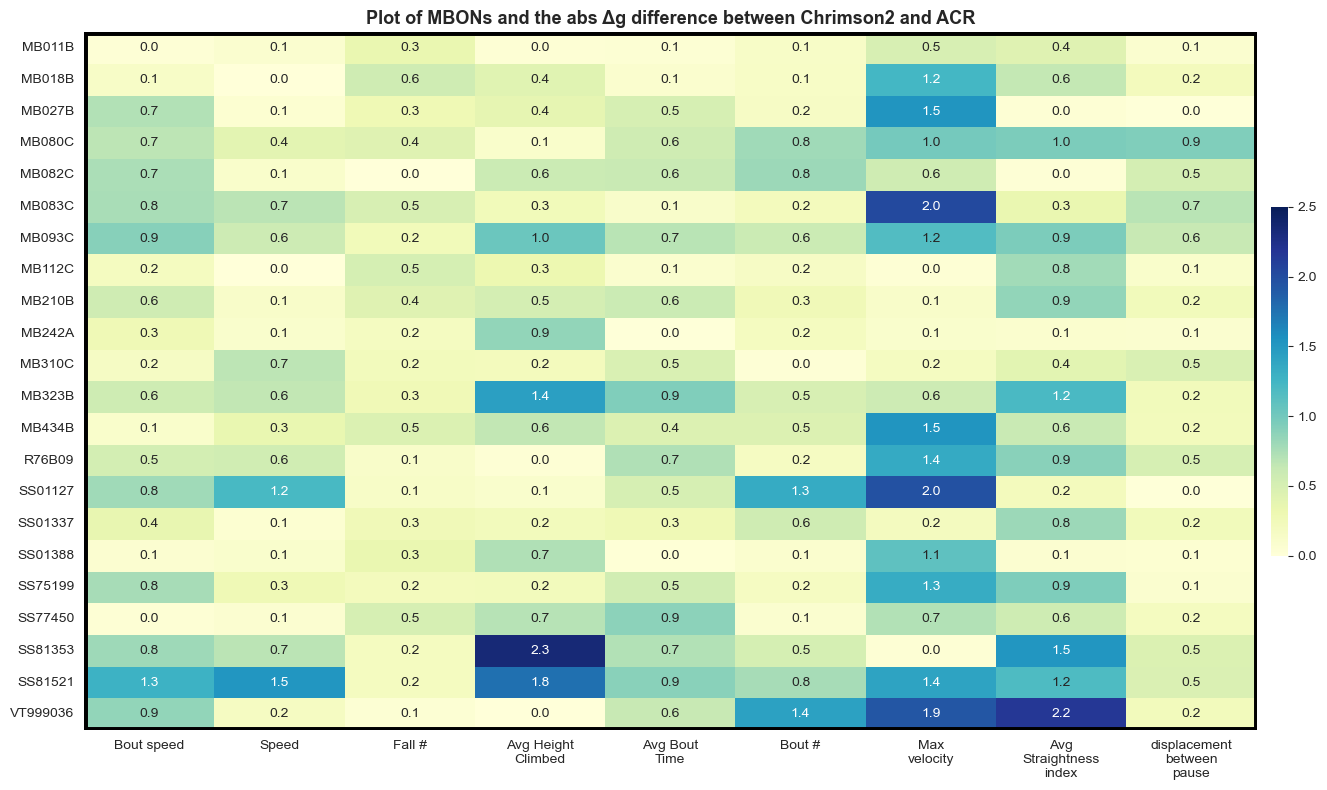

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

effectsizediff = effectsizediff.sort_values(by = "responder", ascending=True).reset_index(drop=True)
df00 = effectsizediff.copy()
df50 = df00.set_index(['responder'])
fig1, ax3 = plt.subplots(figsize=(15, 8))     

sns.set_style("whitegrid", {'axes.grid' : False})           
j7 = sns.heatmap(df50, ax = ax3, annot=True, fmt=".1f", vmin = 0, vmax = 2.5, cmap='YlGnBu', linewidths=0.0, edgecolor = "none"
                 , clip_on=False, cbar_kws={"shrink": 0.5, "pad": 0.01}) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01 #cbar_kws = dict(orientation = "vertical")
j7.set_ylabel('')
j7.set_yticklabels(j7.get_yticklabels(), va='center', rotation = 0, fontsize = 10)
j7.set_xticklabels(j7.get_xticklabels(), rotation = 0, fontsize = 10)

wrap_labels(j7, 10)

from matplotlib.patches import Rectangle

# Drawing the frame 
j7.axhline(y = 0, color = 'k',  
            linewidth = 5) 
  
j7.axhline(y = 22, color = 'k', 
            linewidth = 5) 
  
j7.axvline(x = 0, color = 'k', 
            linewidth = 5) 
  
j7.axvline(x = 9, color = 'k', 
            linewidth = 5) 

j7.set_title('Plot of MBONs and the abs Δg difference between Chrimson2 and ACR', x=0.5, weight='bold', fontsize =13 )

fig1.tight_layout()

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_deltagheatmapwithlobelocations_forfirst10s.png", dpi = 1200)

average euclidean


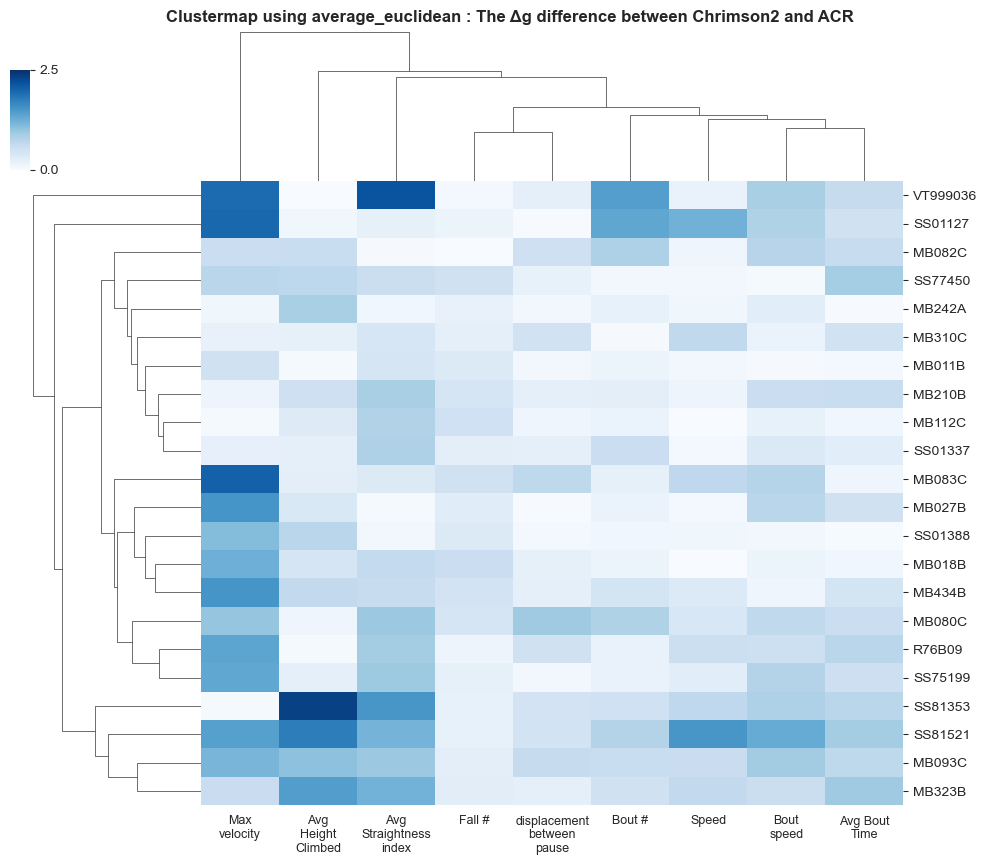

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df80 = df00.set_index(['responder'])
methodlist = ['average']
metriclist = ['euclidean']

for methodd in methodlist:
    for metricc in metriclist:
        print (methodd + " " + metricc)
        j7 = sns.clustermap(df80, cmap='Blues', metric = metricc, method = methodd,vmin = 0, vmax=2.5, 
                            cbar_kws = dict(shrink = 0.2, ticks = [0, 2.5]), figsize=(10, 10), cbar_pos=(0, 0.84, .02, .1) ) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01
        ax = j7.ax_heatmap
        ax.set_ylabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 9)
        wrap_labels(ax, 8)
        j7.fig.suptitle('Clustermap using ' + methodd + "_" + metricc + ' : The Δg difference between Chrimson2 and ACR', weight='bold', fontsize =12, y =1.0)
        
        #plt.savefig(openPath + "images\\" + date + "_" + responder + "_clustermap_" + methodd + "_" + metricc + "_" + secondrule +".png", dpi = 1200)

## division heatmap

In [27]:
effectsizedivision = pd.DataFrame()
for n in matchingset:
    newt = dfreg_resp[dfreg_resp['MBON'] == n]
    MBONlabel = pd.DataFrame()
    MBONlabel['responder'] = [n]
    newtdivision1 = newt.iloc[:,:-2].abs().iloc[0,:]
    newtdivision2 = newt.iloc[:,:-2].abs().iloc[1,:]
    division = newtdivision1.div(newtdivision2).to_frame().T.reset_index(drop=True)
    newton = pd.concat([MBONlabel, division], axis = 1)
    effectsizedivision = pd.concat([effectsizedivision, newton]).reset_index(drop=True)
effectsizedivision

,responder,Bout speed,Speed,Fall #,Avg Height Climbed,Avg Bout Time,Bout #,Max velocity,Avg Straightness index,displacement between pause
0,MB011B,0.915493,0.333333,1.913793,1.258242,1.727273,0.481343,0.346103,0.197417,1.291946
1,MB083C,9.216216,16.512821,0.384401,1.830565,10.615385,0.200717,2.142636,2.542553,6.430108
2,SS81353,0.013906,0.383774,12.066667,0.341183,0.030129,0.259098,1.067381,0.299571,0.243421
3,MB027B,5.042017,0.889706,0.102273,0.592437,0.498498,0.459459,4.155405,0.487179,0.905109
4,SS75199,0.912500,7.250000,32.000000,0.707500,0.311594,0.659813,0.891089,0.492846,0.732673
5,MB093C,0.038503,0.001721,2.915385,0.364706,0.347059,0.098634,1.716937,0.685613,0.047138
6,MB434B,0.625828,5.840000,0.066059,3.012422,3.787234,2.957265,1.316667,0.220238,2.134328
7,R76B09,0.653251,0.069231,0.576159,0.836066,2.548544,0.692573,1.688492,0.932900,4.393617
8,VT999036,0.042363,1.110902,1.391304,1.003367,0.453663,3.224852,4.904908,0.553802,0.770688
9,MB242A,0.462766,1.315113,0.073864,0.897321,1.061111,0.670588,3.244444,1.764706,0.561856


## arranged in no particular order

In [11]:
lobelocation = pd.DataFrame()

directorynew = os.path.dirname(os.path.dirname(openPath)) #goes up one directory
fileinnewdirc = os.listdir(directorynew)

for file_no2 in fileinnewdirc:
    if ".csv" in file_no2:
        ff = os.path.join(directorynew, file_no2)
        csvfile = pd.read_csv(ff)

csvfile = csvfile.astype('string')

for n, k in zip(["B", "y", "a"], ['β', "γ", "α"]):
    csvfile['Lobe'] = csvfile['Lobe'].str.replace(n, k)

for m in dfreg_a['MBON']:
    lobeloc = pd.DataFrame()
    unqlist = []
    lobeloc['MBON'] = [m]
    loclst = find_number(csvfile, m, "Lobe")
    mbonlst = find_number(csvfile, m, "MBON number")
    ntlst = find_number(csvfile, m, "Neurotransmitter")
    lobeloc['Lobe_location'] = [loclst]
    lobeloc['MBON number'] = [mbonlst]
    lobeloc['Neurotransmitter'] = [ntlst]
    
    lobelocation = pd.concat([lobelocation, lobeloc])

lobelocation = lobelocation.reset_index(drop=True)

NameError: name 'dfreg_a' is not defined

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# lobeloc = specificmbonlist(lobelocation)
dfreglobe =dfreg_ACR.copy()
dfreglobe['Lobe'] = lobelocation['Lobe_location']
dfreglobe['Name'] = lobelocation['MBON number']
df00 = dfreglobe.copy()

df50 = df00.set_index(['Name'])
df50 = df50.drop(['MBON', 'Lobe'], axis =1)
fig1, ax3 = plt.subplots(figsize=(16, 8))     
#colorbar
cax = inset_axes(ax3,
                 width="15%",  # width: 40% of parent_bbox width
                 height="2%",  # height: 10% of parent_bbox height
                 loc='lower right',
                 bbox_to_anchor=(0.1, 1.1, 1, 1),
                 bbox_transform=ax3.transAxes,
                 borderpad=-2,
                 )
sns.set_style("whitegrid", {'axes.grid' : False})           
j7 = sns.heatmap(df50, ax = ax3, annot=True, fmt=".1f", vmin = -1.5, vmax = 1.5, cmap='coolwarm', linewidths=0.5, linecolor='black'
                 , clip_on=False,  cbar_ax=cax, cbar_kws = dict(orientation = "horizontal")) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01
j7.set_ylabel('')
j7.set_yticklabels(j7.get_yticklabels(), va='center', rotation = 0, fontsize = 12)
j7.set_xticklabels(j7.get_xticklabels(), rotation = 0, fontsize = 12)

#secondary axes
j8 = j7.twinx()
j8.set_ylim([0,j7.get_ylim()[0]])
j8.set_yticks(j7.get_yticks())

j8.set_yticklabels(df00['MBON'].iloc[::-1], fontsize=12)
j8.spines['top'].set_visible(False)
j8.spines['right'].set_visible(False)
j8.spines['bottom'].set_visible(False)
j8.spines['left'].set_visible(False)


wrap_labels(j7, 10)
j7.set_title('Plot of MBONs > ' + responder + ' and their Δg across locomotor reactivity parameters for first 20seconds', x=0.4, weight='bold', fontsize =16 )

# #fig1.tight_layout()

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_deltagheatmapwithlobelocations_forfirst10s.png", dpi = 1200)

KeyError: 'Lobe_location'

## lobe location

In [18]:
newfile = openPath + "Compilation with delta\\twentysecondrule\\"
files = os.listdir(newfile)

for y in files:
    if responder in y:
        name = y.split(" ")[1]
        newfileread = pd.read_csv(newfile + y)
        globals()[name] = (newfileread.set_index("MBON"))
        
secondrule = "20seconds"

if "ten" in newfile:
    secondrule = "10seconds"
if "eight" in newfile:
    secondrule = "8seconds"
if "five" in newfile:
    secondrule = "5seconds"
    
directorynew = os.path.dirname(os.path.dirname(openPath)) #goes up one directory
fileinnewdirc = os.listdir(directorynew)

for file_no2 in fileinnewdirc:
    if ".csv" in file_no2:
        ff = os.path.join(directorynew, file_no2)
        csvfile = pd.read_csv(ff)

csvfile = csvfile.astype('string')

for n, k in zip(["B", "y", "a"], ['β', "γ", "α"]):
    csvfile['Lobe'] = csvfile['Lobe'].str.replace(n, k)


In [19]:
lobelocation = pd.DataFrame()

for m in dblist.index.tolist():
    lobeloc = pd.DataFrame()
    unqlist = []
    lobeloc['MBON'] = [m]
    loclst = find_number(csvfile, m, "Lobe")
    mbonlst = find_number(csvfile, m, "MBON number")
    ntlst = find_number(csvfile, m, "Neurotransmitter")
    lobeloc['Lobe_location'] = [loclst]
    lobeloc['MBON number'] = [mbonlst]
    lobeloc['Neurotransmitter'] = [ntlst]
    
    lobelocation = pd.concat([lobelocation, lobeloc])

lobelocation = lobelocation.reset_index(drop=True)


## linear regression via metrics

In [11]:
dfreg_a = matchingdfs(dfreg_ACR, matchingset)
dfreg_c = matchingdfs(dfreg_Cr2, matchingset)

In [33]:
def matchinglobesets(dfreg_a, lobelocation):
    lobelocation_a = lobelocation.sort_values(by=['MBON']).reset_index(drop=True)
    dfreg_a_withloc = dfreg_a.sort_values(by=['MBON']).reset_index(drop=True)
    matchinglobereg = list(set(lobelocation_a['MBON']) & set(dfreg_a_withloc['MBON']))

    dflobe_reg = matchingdfs(lobelocation_a, matchinglobereg).sort_values(by=['MBON']).reset_index(drop=True)

    dfreg_a_withloc['Lobe_location'] = dflobe_reg['Lobe_location']
    dfreg_a_withloc['MBON number'] = dflobe_reg['MBON number']
    dfreg_a_withloc['Neurotransmitter'] = dflobe_reg['Neurotransmitter']

    return dfreg_a_withloc

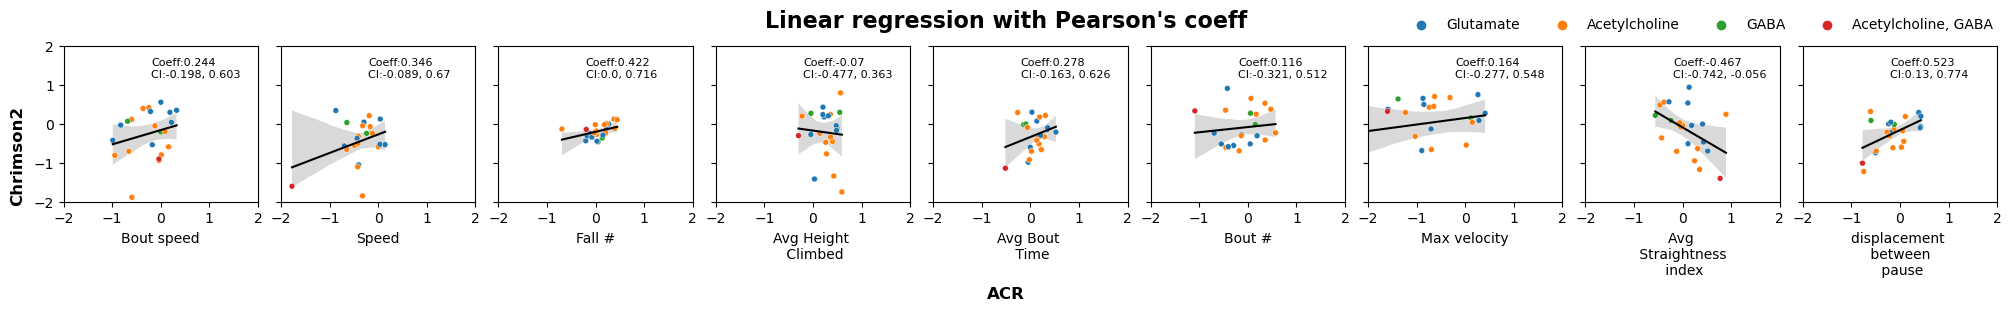

In [118]:
import scipy.stats
fig2, ax2 = plt.subplots(nrows = 1, ncols = 9, figsize = (20, 3), sharey = True, layout= 'constrained')
labels = [ ' \n '.join(wrap(l, 12)) for l in dfreg_a.columns[:-2].tolist()]

for c,(n,leg) in enumerate(zip(dfreg_a.columns[:-2].tolist(),8*[False]+[True])):
    spare = pd.DataFrame()
    spare["ACR"] = matchinglobesets(dfreg_a, lobelocation)[n]
    spare['Chrimson2'] = matchinglobesets(dfreg_c, lobelocation)[n]
    spare['NT'] = matchinglobesets(dfreg_c, lobelocation)['Neurotransmitter']
    sns.regplot(x="ACR", y="Chrimson2", data=spare, ci = 95, scatter = False, line_kws={"color": "black", 'lw': 1.5}, ax=ax2[c]) 
    sns.scatterplot(x="ACR", y="Chrimson2", data=spare, hue='NT', s = 3, ax = ax2[c], legend = leg)
    ax2[c].set_xlim([-2,2])
    ax2[c].set_ylim([-2,2])
    ax2[c].set_xlabel(labels[c])
    ax2[c].set_ylabel("")
    
    #pearsons correlation
    pearsonscorrelation = scipy.stats.pearsonr(dfreg_a[n], dfreg_c[n]) #correlation instead of linear regression: trying to find the relationship rather than causation    
    civallow = pearsonscorrelation.confidence_interval(confidence_level=0.95)[0] 
    civalhigh = pearsonscorrelation.confidence_interval(confidence_level=0.95)[1]   
    ax2[c].annotate("Coeff:" + str(round(pearsonscorrelation[0],3)) + "\nCI:" + str(round(civallow,3)) + ", " + str(round(civalhigh,3)), (0.45, 0.8), ha = "left", xycoords = 'axes fraction', fontsize = 8)

fig2.supxlabel("ACR", weight = "bold")
fig2.supylabel("Chrimson2", weight = "bold")
fig2.suptitle("Linear regression with Pearson's coeff", fontsize = 16, weight="bold")

new_labels = ['Glutamate', 'Acetylcholine', 'GABA', 'Acetylcholine, GABA']
legend_handles, _= ax2[c].get_legend_handles_labels()
lgd = fig2.legend(legend_handles, new_labels, 
          bbox_to_anchor=(1,1), ncol = 4, frameon = False)
ax2[c].get_legend().set_visible(False)

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_bidirectionalitycheck.png", dpi = 1200, bbox_inches='tight')

## circles

In [ ]:
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
# fig3, axthree = plt.subplots(nrows = 1, ncols = 9, figsize = (20, 3), sharey = True, layout= 'constrained')


for c,(n,leg) in enumerate(zip(dfreg_a.columns[:-2].tolist(),8*[False]+[True])):
    fig3, axthree = plt.subplots(figsize = (5, 5))
    
    spare = pd.DataFrame()
    spare["ACR"] = matchinglobesets(dfreg_a, lobelocation)[n]
    spare['Chrimson2'] = matchinglobesets(dfreg_c, lobelocation)[n]
    spare['NT'] = matchinglobesets(dfreg_c, lobelocation)['Neurotransmitter']
    
    #kmeans
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(spare.iloc[:,0:2])
    
    #scatter
    sns.scatterplot(x="ACR", y="Chrimson2", data=spare, hue='NT', s = 20, legend = True)
    
    #clustering
    for cluster in range(3):
        cluster_points = spare.iloc[:,0:2][clusters == cluster]
        centroid = cluster_points.mean(axis=0)
        #radius = np.max(np.sqrt(np.sum((cluster_points - centroid)**2, axis=1)))
        width = 0.5*(cluster_points['Chrimson2'].max(axis = 0) - cluster_points['Chrimson2'].min(axis = 0))
        height = 0.5*(cluster_points['ACR'].max(axis = 0) - cluster_points['ACR'].min(axis = 0))
        circle = Ellipse(centroid, width, height, color = "blue", fill = False, linewidth = 1, linestyle = "--")
        axthree.add_artist(circle)
        
    axthree.set_xlim([-2,2])
    axthree.set_ylim([-2,2])
    axthree.set_xlabel(n, fontsize = 8)
    axthree.set_ylabel("")
    

    fig3.supxlabel("ACR", fontsize = 8,  weight = "bold")
    fig3.supylabel("Chrimson2", fontsize = 8, weight = "bold")
    fig3.suptitle("Clusterings", fontsize = 12, weight="bold")

    plt.legend(loc=2, prop={'size': 6})

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_bidirectionalitycheck.png", dpi = 1200, bbox_inches='tight')

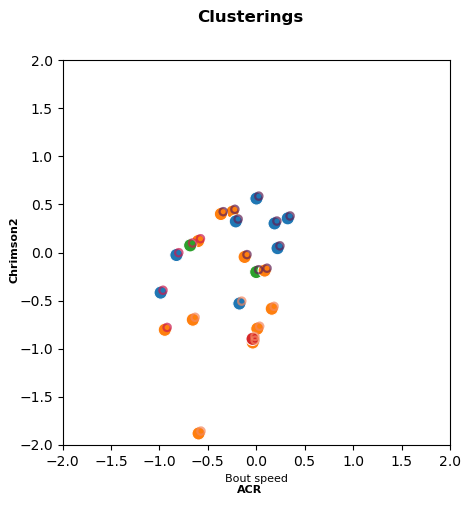

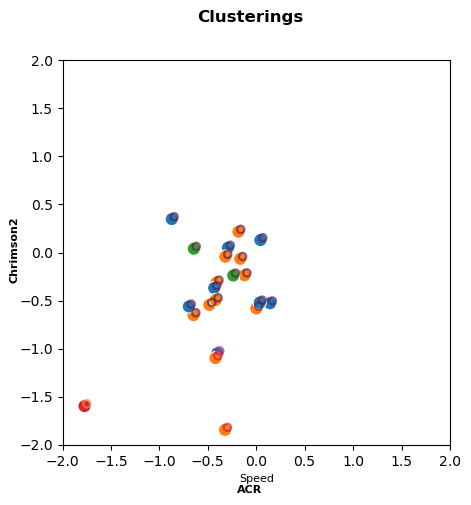

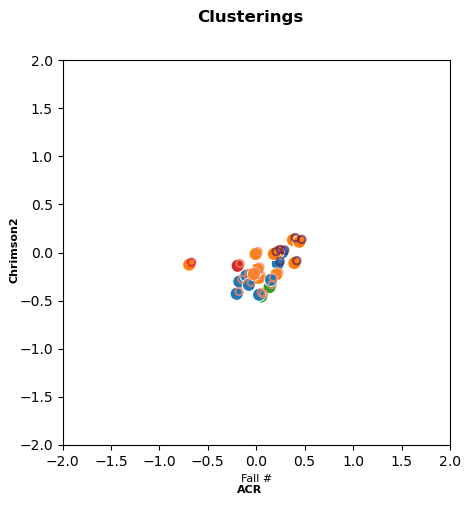

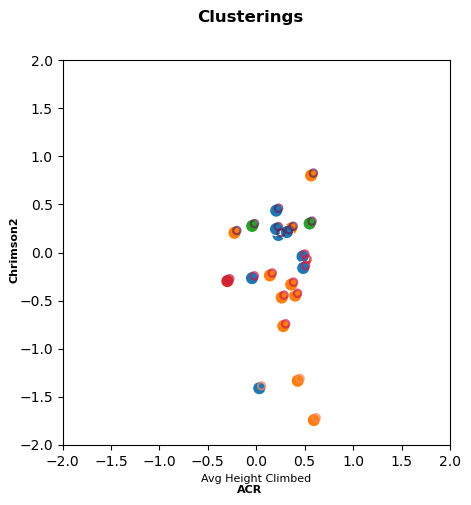

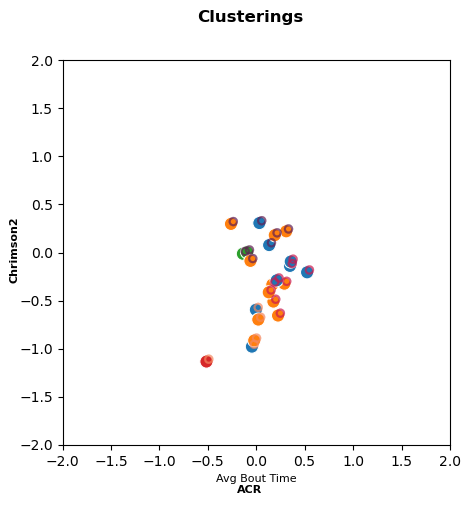

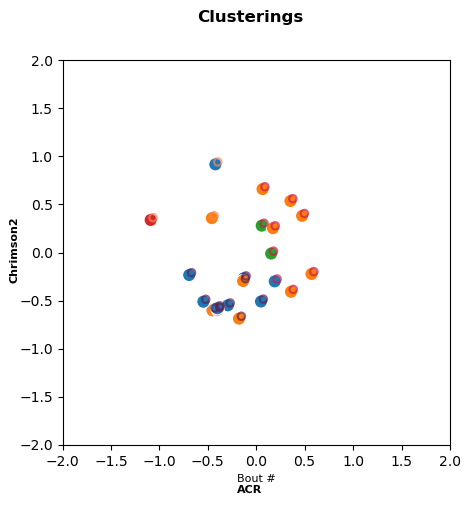

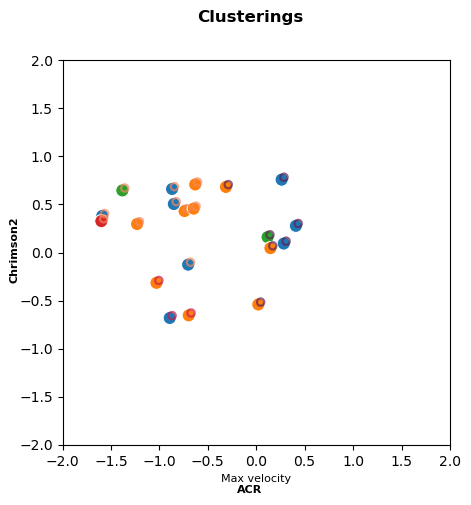

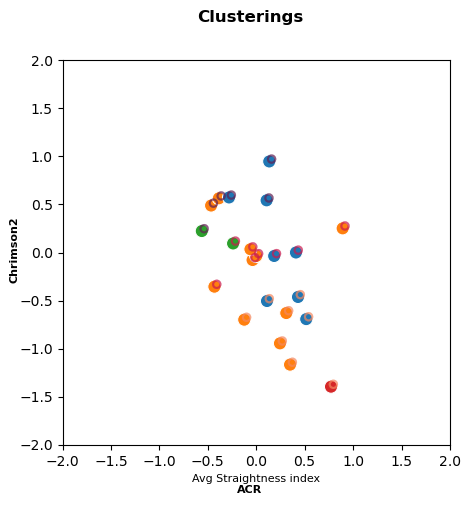

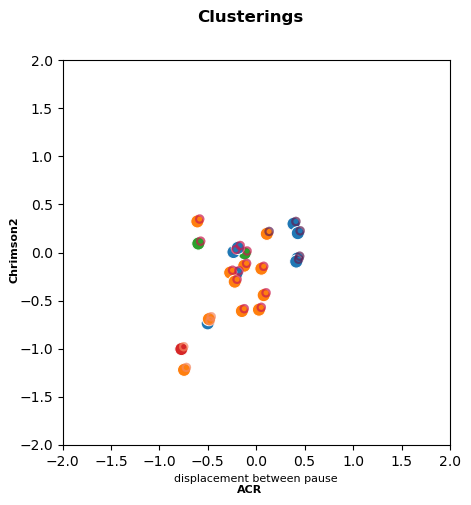

In [213]:
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
# fig3, axthree = plt.subplots(nrows = 1, ncols = 9, figsize = (20, 3), sharey = True, layout= 'constrained')


for c,(n,leg) in enumerate(zip(dfreg_a.columns[:-2].tolist(),8*[False]+[True])):
    fig3, axthree = plt.subplots(figsize = (5, 5))
    
    spare = pd.DataFrame()
    spare["ACR"] = matchinglobesets(dfreg_a, lobelocation)[n]
    spare['Chrimson2'] = matchinglobesets(dfreg_c, lobelocation)[n]
    spare['NT'] = matchinglobesets(dfreg_c, lobelocation)['Neurotransmitter']
    
    #kmeans
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(spare.iloc[:,0:2])
    cluster = ['k-means_c_' + str(c) for c in clusters]
    X = spare.iloc[:,0:2]
    
    #scatter
    sns.scatterplot(x="ACR", y="Chrimson2", data=spare, hue='NT', s = 90, legend = False)
    sns.scatterplot(x="ACR", y="Chrimson2", data=X.iloc[:,0:2].assign(cluster = cluster), hue='cluster', legend = False, marker="$\circ$", ec="face", s=100, linewidth = 0.2, alpha = 0.7, palette = "rocket")
           
    axthree.set_xlim([-2,2])
    axthree.set_ylim([-2,2])
    axthree.set_xlabel(n, fontsize = 8)
    axthree.set_ylabel("")
    

    fig3.supxlabel("ACR", fontsize = 8,  weight = "bold")
    fig3.supylabel("Chrimson2", fontsize = 8, weight = "bold")
    fig3.suptitle("Clusterings", fontsize = 12, weight="bold")


#plt.savefig(openPath + "images\\" + date + "_" + responder + "_bidirectionalitycheck.png", dpi = 1200, bbox_inches='tight')

In [40]:
df_completeresponder = pd.concat([dfreg_a, dfreg_c])
df_lregmbon = df_completeresponder.sort_values(['MBON']).reset_index(drop=True)

In [ ]:
import scipy.stats
fig7, ax7 = plt.subplots(nrows = 5, ncols = 5, figsize = (10, 10), sharey = True, sharex = True, layout= 'constrained')
for name,row,col in zip(dfreg_a['MBON'], 5*list(range(0,5)), 5*[0]+5*[1]+5*[2]+5*[3]+ 5*[4] +5*[5]):
    df_meltedreg = pd.melt(df_lregmbon[(df_lregmbon['MBON'] == name)], id_vars = ['responder', "MBON"])   
    df_a1= df_meltedreg[(df_meltedreg['responder'] == 'Cr2')]
    df_c1=df_meltedreg[(df_meltedreg['responder'] == 'ACR')]
    
    ax7[row][col].scatter(x= df_a1['value'], y = df_c1['value'],
                color='grey',
                edgecolors="r",
                alpha=0.8,
                s=30)
    
    sns.regplot(x= df_a1['value'], y = df_c1['value'],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                ax=ax7[row][col],
                truncate=False)

    ax7[row][col].set(xlabel=None)
    ax7[row][col].set(ylabel=None)
    ax7[row][col].set_ylim(-2.1,2.1)  
    ax7[row][col].set_xlim(-2.1,2.1) 
    ax7[row][col].set_title(name, fontsize = 12)

    
    #pearsons correlation
    pearsonscorrelation = scipy.stats.pearsonr(df_a1['value'], df_c1['value']) #correlation instead of linear regression: trying to find the relationship rather than causation    
    civallow = pearsonscorrelation.confidence_interval(confidence_level=0.95)[0] 
    civalhigh = pearsonscorrelation.confidence_interval(confidence_level=0.95)[1]
    ax7[row][col].annotate("Coeff:" + str(round(pearsonscorrelation[0],3)) + "\nCI:" + str(round(civallow,3)) + ", " + str(round(civalhigh,3)), (0.55, 0.8), ha = "left", xycoords = 'axes fraction', fontsize = 9)

    
fig7.supxlabel("ACR", weight = "bold")
fig7.supylabel("Chrimson2", weight = "bold")
fig7.suptitle("Linear regression with Pearson's coeff", fontsize = 16, weight="bold")

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_bidirectionalitycheckMBON.png", dpi = 1200, bbox_inches='tight')

## heatmap df generation

In [120]:
#delta g only
#dblist = dblist.set_index("MBON")

import scikits.bootstrap as skb
dfreg2 = pd.DataFrame()
for n in list(dblist.index):
    dfreg = pd.DataFrame()
    dfreg["Bout speed"] = dfreg_bspeed[dfreg_bspeed.index == n]['delta_g']
    dfreg["Speed"] = dfreg_speed[dfreg_speed.index == n]['delta_g']
    dfreg["Fall #"] = dfreg_fall[dfreg_fall.index == n]['delta_g']
    dfreg["Avg Height"] = dfreg_height[dfreg_height.index == n]['delta_g']
    # dfreg["Time to reach 3/4 chamber"] = dfreg_time[dfreg_time.index == n]['delta_g']
    # dfreg["Mean\n Pause"] = dfreg_meanpause[dfreg_meanpause.index == n]['delta_g']
    # dfreg["Pause #"] = dfreg_pause[dfreg_pause.index == n]['delta_g']
    dfreg["Avg Bout duration"] = dfreg_meanbout[dfreg_meanbout.index == n]['delta_g']
    dfreg["Bout #"] = dfreg_bout[dfreg_bout.index == n]['delta_g']
    # dfreg["Bout position"] = dfreg_boutpos[dfreg_boutpos.index == n]['delta_g']
    # dfreg["Pause\n position"] = dfreg_pausepos[dfreg_pausepos.index == n]['delta_g']
    #new features
    dfreg["Max velocity"] = dfreg_maxvelocity[dfreg_maxvelocity.index == n]['delta_g']
    dfreg["Avg Straightness index"] = dfreg_straightindex[dfreg_straightindex.index == n]['delta_g']
    # dfreg["displacement between pause"] = dfreg_displacementbetweenpause[dfreg_displacementbetweenpause.index == n]['delta_g']
    dfreg['MBON'] = n
    dfreg2 = pd.concat([dfreg2, dfreg], axis = 0).reset_index(drop=True)

#dfreg2['Lobe'] = lobelocation['Lobe_location']

## scatter plot clustering

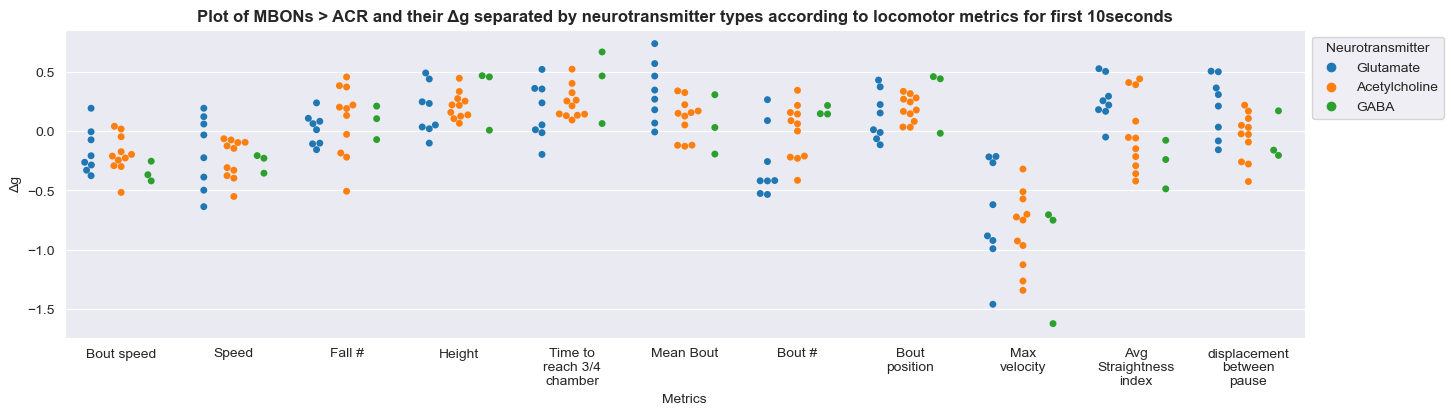

In [ ]:
dfreglobe = dfreg2.copy()
dfreglobe['Lobe'] = lobelocation['Lobe_location']
dfreglobe['Name'] = lobelocation['MBON number']
dfreglobe['Neurotransmitter'] = lobelocation['Neurotransmitter']

df00 = dfreglobe.copy()
novt = df00[(df00['MBON']== "VT999036")].index
df50 = df00.drop(novt)
df50 = df50.drop(['MBON', 'Name', 'Lobe'], axis =1)

fig, axes = plt.subplots(figsize=(16,4))

df89 = pd.melt(df50, id_vars = ['Neurotransmitter'], var_name = 'Metrics', value_name = "Δg")
g1 = sns.swarmplot(data=df89, x= 'Metrics', y = 'Δg', hue='Neurotransmitter',dodge = True)
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))
sns.set_style("darkgrid")
wrap_labels(axes, 10)
g1.set_title('Plot of MBONs > ' + responder + ' and their Δg separated by neurotransmitter types according to locomotor metrics for first ' + secondrule, weight='bold', fontsize =12 )

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_separationbyNTtypes_" + secondrule +".png", dpi = 1200, bbox_inches='tight')

## sns paired plot

Text(0.5, 1.02, 'MBONs > ACR')

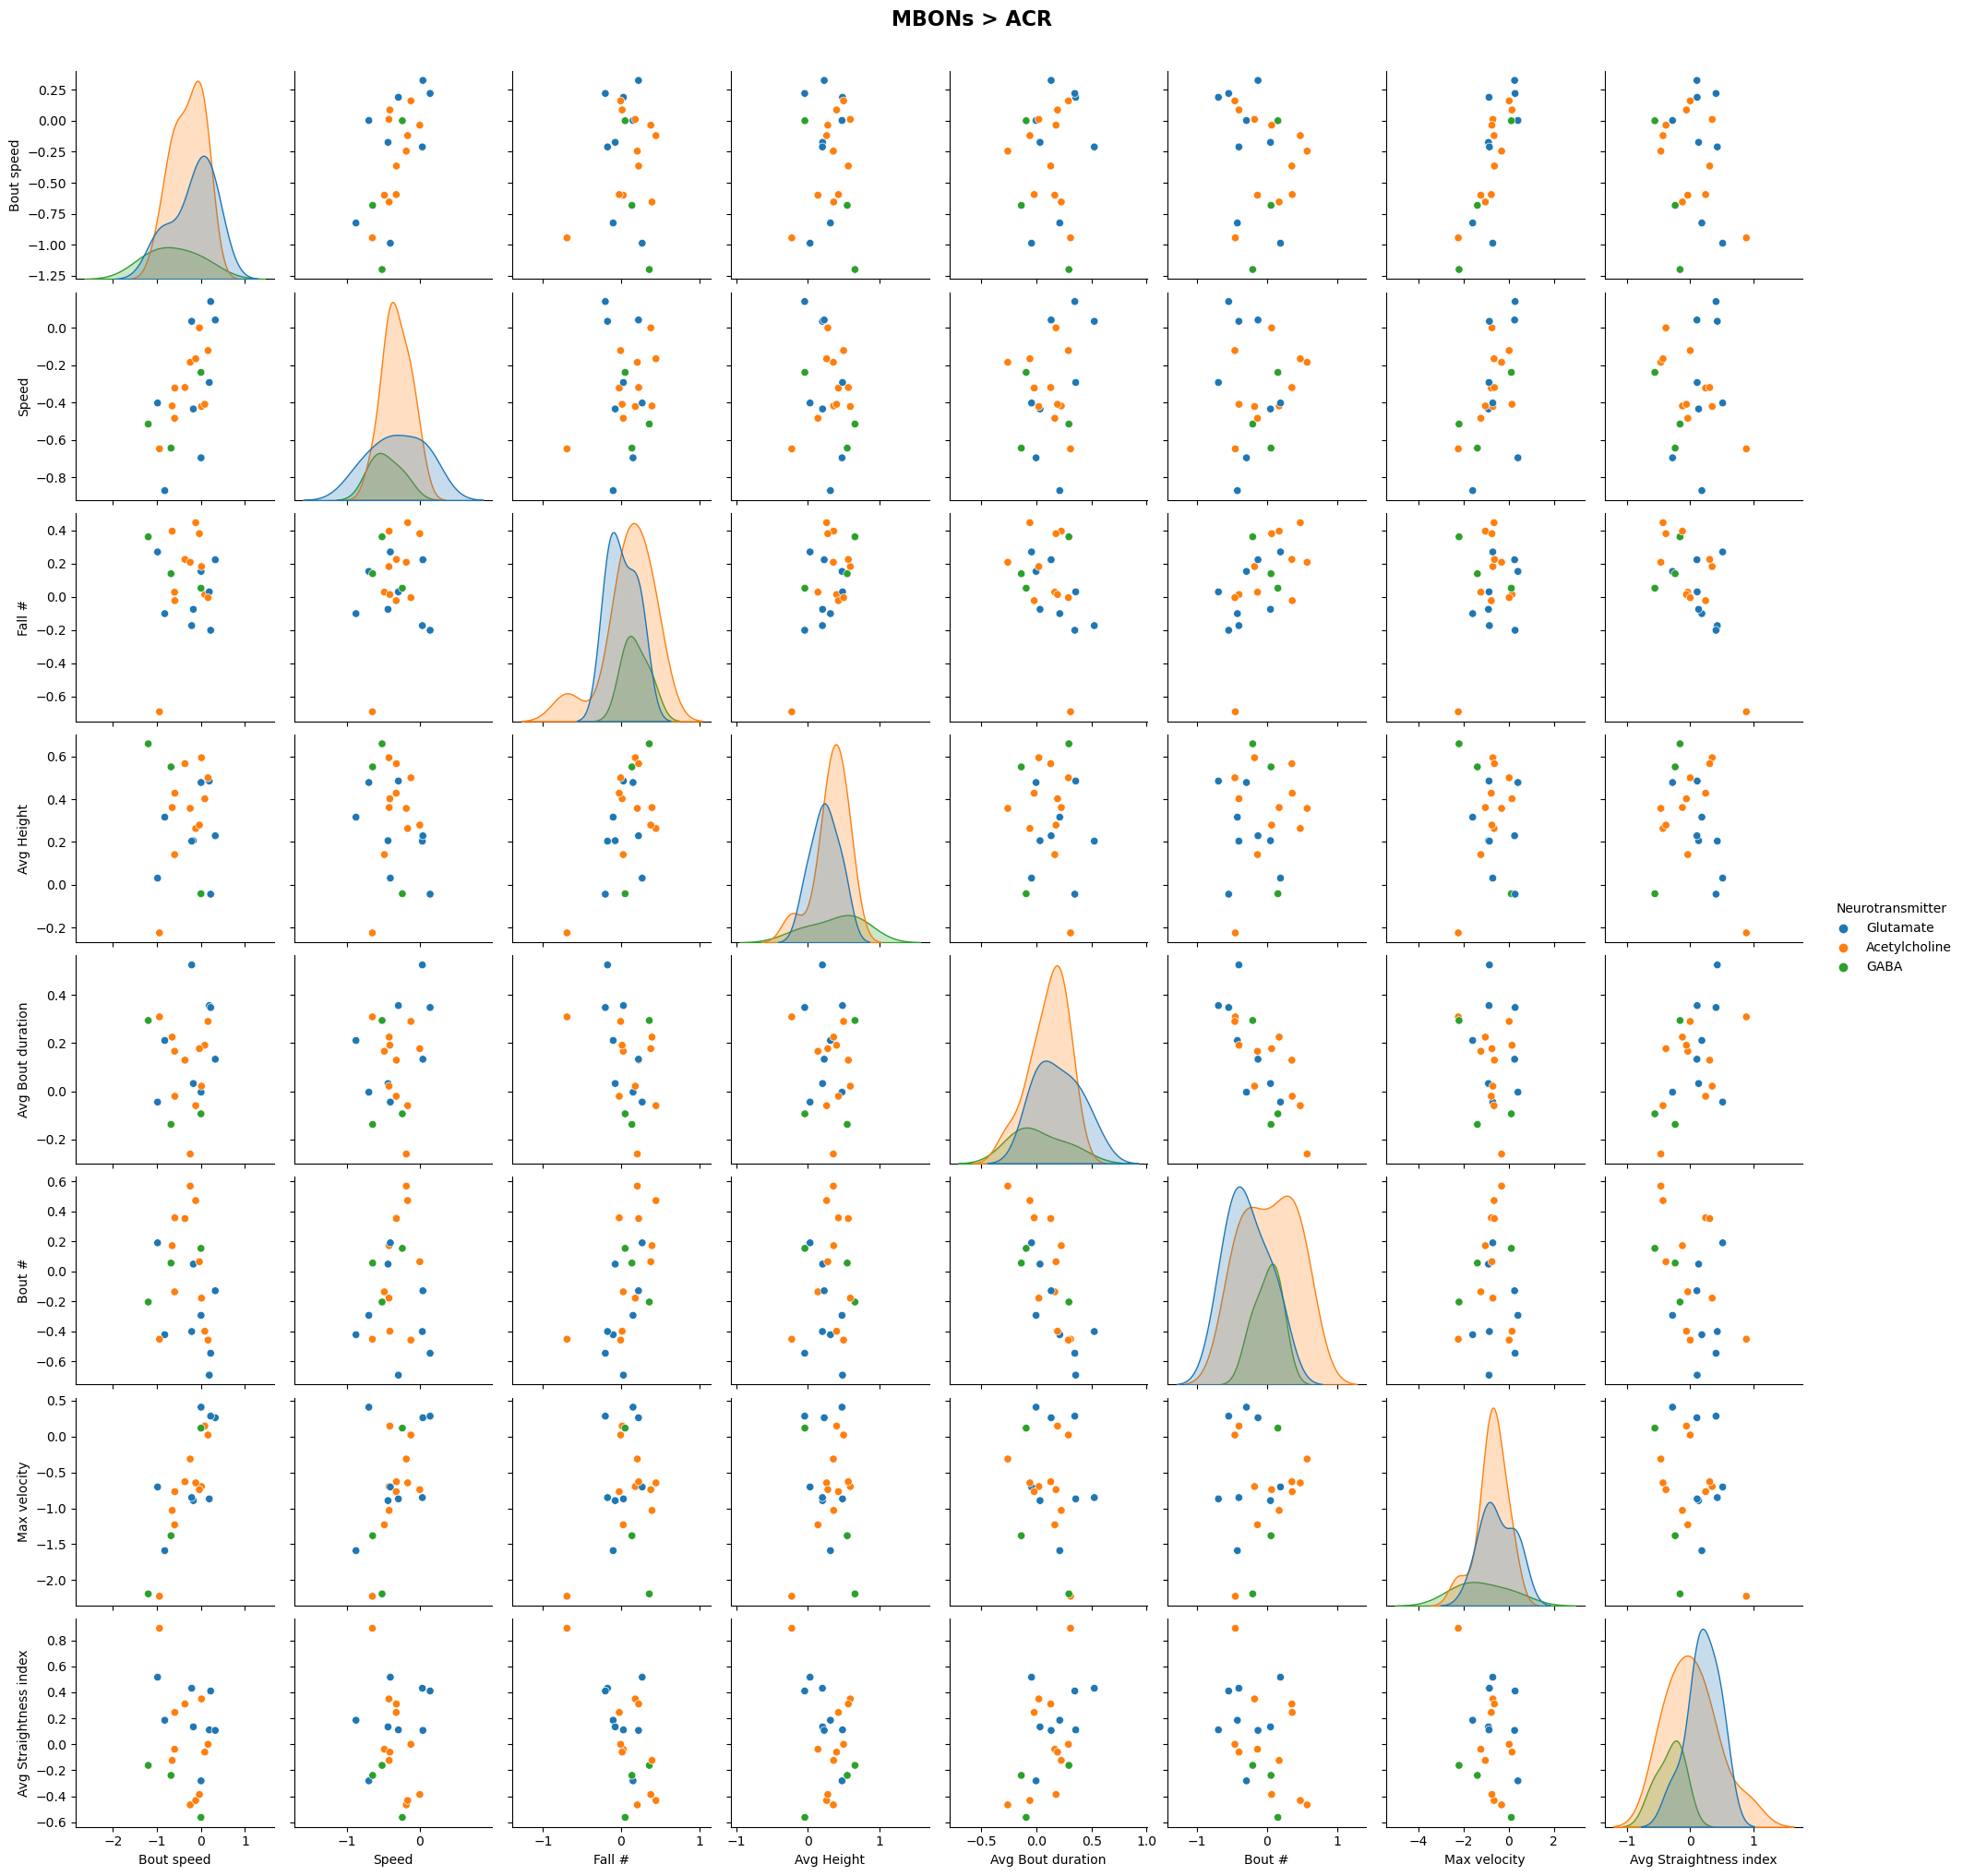

In [121]:
dfreglobe = dfreg2.copy()
dfreglobe['Lobe'] = lobelocation['Lobe_location']
dfreglobe['Name'] = lobelocation['MBON number']
dfreglobe['Neurotransmitter'] = lobelocation['Neurotransmitter']

df00 = dfreglobe.copy()
novt = df00[(df00['MBON']== "VT999036")].index
df50 = df00.drop(novt)
df50 = df50.drop(['MBON', 'Name', 'Lobe'], axis =1)

t1 = sns.pairplot(data=df50, hue='Neurotransmitter')
t1.fig.suptitle('MBONs > ' + responder, weight='bold', fontsize =16, y = 1.02 )

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_separationbyNTtypes_" + secondrule +".png", dpi = 1200, bbox_inches='tight')

## clustermap

average euclidean


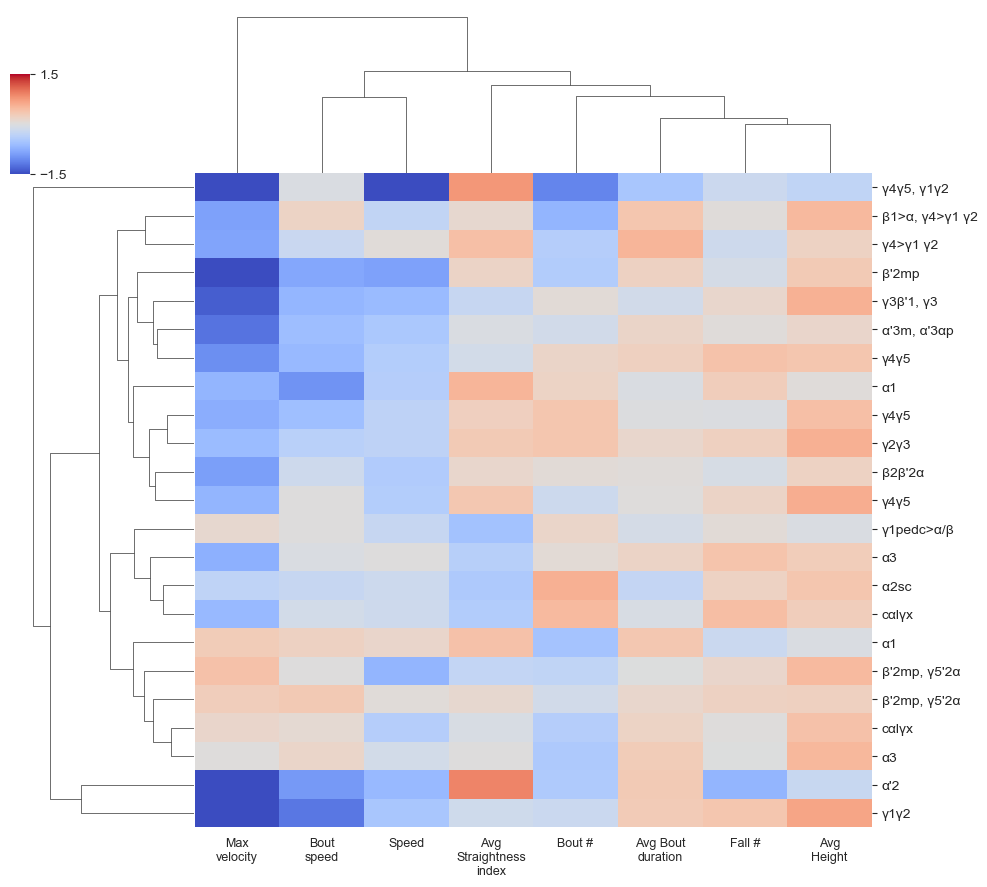

In [34]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

dfreglobe = dfreg2.copy()
dfreglobe['Lobe'] = lobelocation['Lobe_location']
dfreglobe['Name'] = lobelocation['MBON number']
dfreglobe['Neurotransmitter'] = lobelocation['Neurotransmitter']

df00 = dfreglobe.copy()

df50 = df00.set_index(['Lobe'])
df50 = df50.drop(['MBON', 'Name', 'Neurotransmitter'], axis =1)
methodlist = ['average']
metriclist = ['euclidean']

for methodd in methodlist:
    for metricc in metriclist:
        print (methodd + " " + metricc)
        j7 = sns.clustermap(df50, cmap='coolwarm', metric = metricc, method = methodd,vmin = -1.5, vmax=1.5, 
                            cbar_kws = dict(shrink = 0.2, ticks = [-1.5, 1.5]), figsize=(10, 10), cbar_pos=(0, 0.82, .02, .1) ) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01
        ax = j7.ax_heatmap
        ax.set_ylabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 9)
        wrap_labels(ax, 8)
        #j7.fig.suptitle('Clustermap using ' + methodd + "_" + metricc + ' :MBONs > ' + responder + ' and their Δg', weight='bold', fontsize =12, y =1.0)
        
        #plt.savefig(openPath + "images\\" + date + "_" + responder + "_clustermap_" + methodd + "_" + metricc + "_" + secondrule +".png", dpi = 1200)

## heatmap arranged by speed

Text(0.4, 1.0, 'Plot of MBONs > ACR and their Δg across locomotor reactivity parameters')

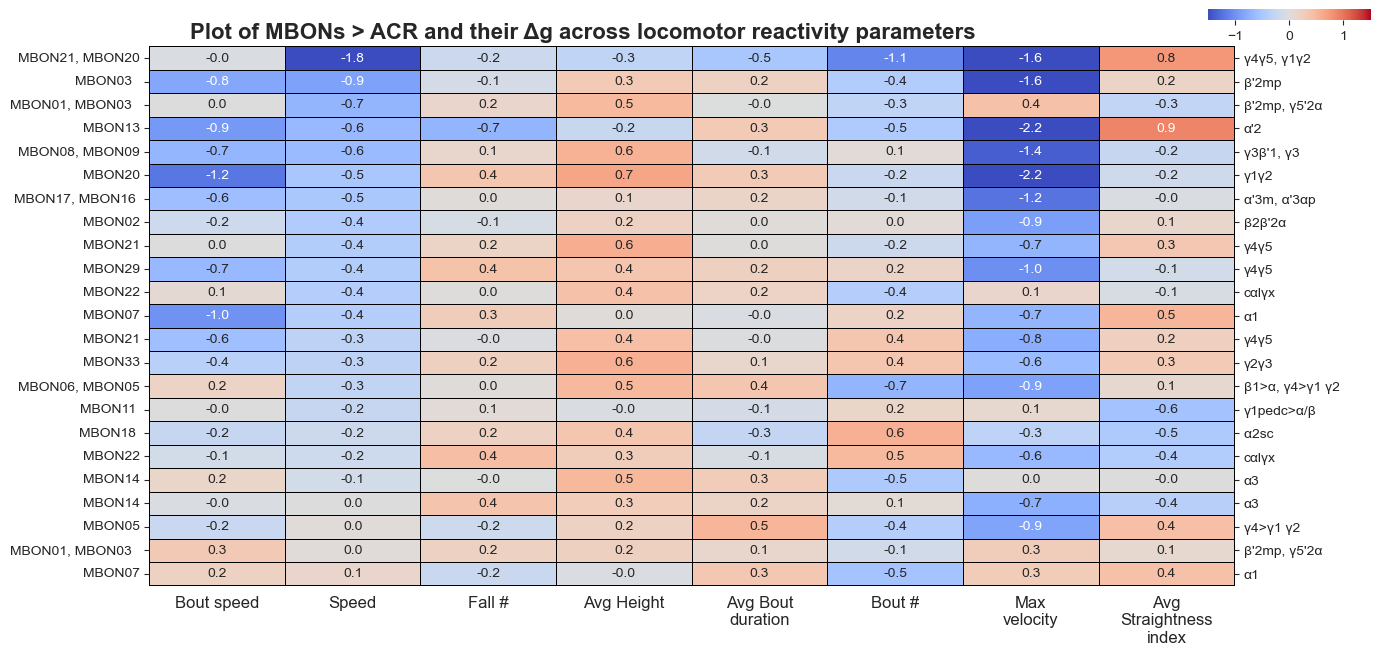

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

secondrule = "20"
dfreglobe = dfreg2.copy()
dfreglobe['Lobe'] = lobelocation['Lobe_location']
dfreglobe['Name'] = lobelocation['MBON number']
df00 = dfreglobe.copy()

df50 = df00.set_index(['Name'])
df50 = df50.drop(['MBON', 'Lobe'], axis =1)
fig1, ax3 = plt.subplots(figsize=(14, 7))     
#colorbar
cax = inset_axes(ax3,
                 width="15%",  # width: 40% of parent_bbox width
                 height="2%",  # height: 10% of parent_bbox height
                 loc='lower right',
                 bbox_to_anchor=(0.1, 1.1, 1, 1),
                 bbox_transform=ax3.transAxes,
                 borderpad=-2,
                 )
sns.set_style("whitegrid", {'axes.grid' : False})           
j7 = sns.heatmap(df50, ax = ax3, annot=True, fmt=".1f", vmin = -1.5, vmax = 1.5, cmap='coolwarm', linewidths=0.5, linecolor='black'
                 , clip_on=False,  cbar_ax=cax, cbar_kws = dict(orientation = "horizontal")) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01
j7.set_ylabel('')
j7.set_yticklabels(j7.get_yticklabels(), va='center', rotation = 0, fontsize = 10)
j7.set_xticklabels(j7.get_xticklabels(), rotation = 0, fontsize = 12)

#secondary axes
j8 = j7.twinx()
j8.set_ylim([0,j7.get_ylim()[0]])
j8.set_yticks(j7.get_yticks())

j8.set_yticklabels(df00['Lobe'].iloc[::-1], fontsize=10)
j8.spines['top'].set_visible(False)
j8.spines['right'].set_visible(False)
j8.spines['bottom'].set_visible(False)
j8.spines['left'].set_visible(False)


wrap_labels(j7, 10)
j7.set_title('Plot of MBONs > ' + responder + ' and their Δg across locomotor reactivity parameters' , x=0.4, weight='bold', fontsize =16 )

#fig1.tight_layout()

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_deltagheatmapwithlobelocations_" + secondrule +".png", dpi = 1200)

## simple heatmap version + delta version

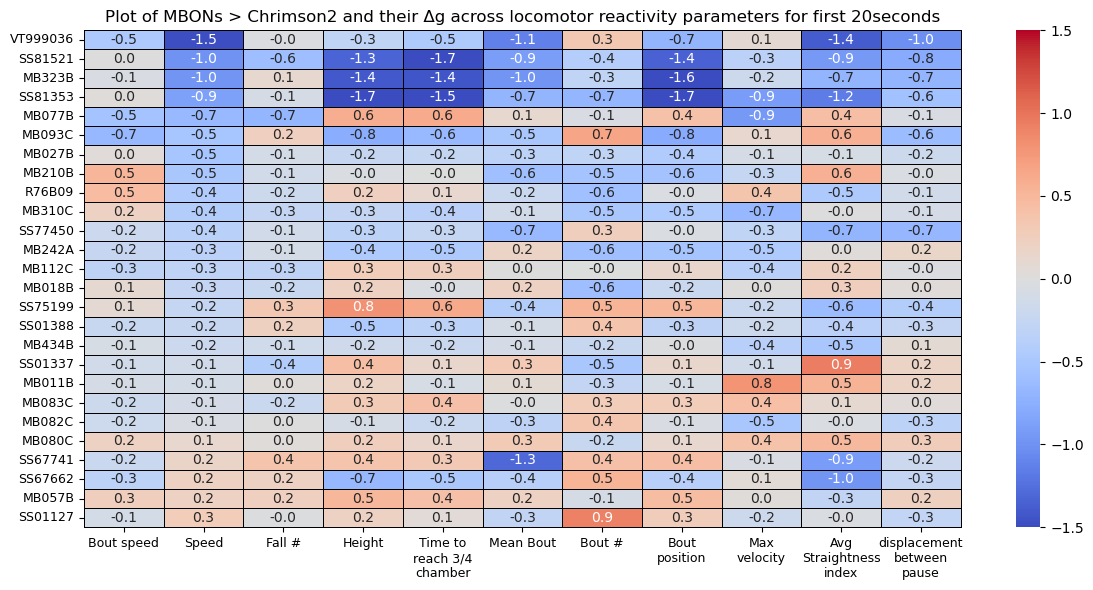

In [ ]:
#simple heatmap
# 
df5 = dfreg2.set_index(['MBON'])
fig, ax1 = plt.subplots(figsize=(12, 6))                
g1 = sns.heatmap(df5, annot=True, fmt=".1f", vmin = -1.5, vmax = 1.5, cmap='coolwarm', linewidths=0.5, linecolor='black', clip_on=False)
g1.set_ylabel('')
g1.set_yticklabels(g1.get_yticklabels(), rotation = 0, fontsize = 9)
g1.set_xticklabels(g1.get_xticklabels(), rotation = 0, fontsize = 9)
wrap_labels(g1, 10)
ax1.set_title('Plot of MBONs > ' + responder + ' and their Δg across locomotor reactivity parameters')
fig.tight_layout()
#plt.savefig(openPath + "images\\" + date + "_" + responder + "_deltagheatmap_" + secondrule +".png", dpi = 1200)

In [ ]:
#delta and delta g heatmap
# 
dfreglist = [dfreg_bspeed.loc[dblist.index], dfreg_speed.loc[dblist.index], dfreg_fall.loc[dblist.index],dfreg_height.loc[dblist.index], dfreg_meanbout.loc[dblist.index], dfreg_bout.loc[dblist.index],dfreg_boutpos.loc[dblist.index], dfreg_maxvelocity.loc[dblist.index],dfreg_straightindex.loc[dblist.index], dfreg_displacementbetweenpause.loc[dblist.index]]
totalregdf = pd.DataFrame()

for n,k in zip(dfreg2.columns[:-1], dfreglist):
    k.columns = pd.MultiIndex.from_product([[n], k.columns.tolist()])
    totalregdf = pd.concat([totalregdf, k], axis =1)


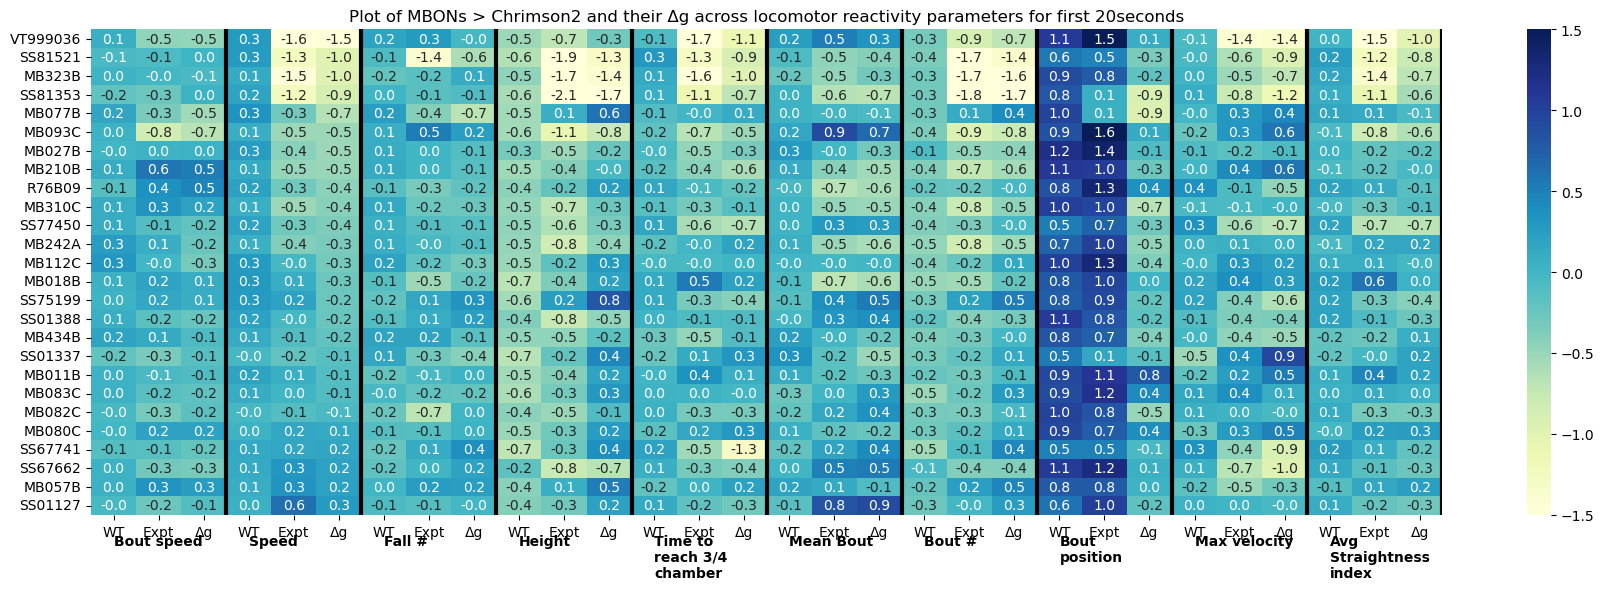

In [ ]:


df0 = totalregdf.copy()
fig, ax2 = plt.subplots(figsize=(18, 6))                

first_row_headers = df0.columns.get_level_values(0)
unique_first_row_headers = first_row_headers.unique()
firstlabels = [ ' \n '.join(wrap(l, 12)) for l in unique_first_row_headers]

second_row_headers = df0.columns.get_level_values(1)
second_headers = [l.replace('delta_', 'Δ') for l in second_row_headers.tolist()]

y3 = sns.heatmap(df0, annot=True, fmt=".1f", vmin = -1.5, vmax = 1.5, cmap='YlGnBu',clip_on=False) # linewidths=0.5, linecolor='black', 
y3.set_ylabel('')
# Calculate the positions for the primary x-tick labels (center of each cell)
tick_positions = [i + 0.5 for i in range(len(second_headers))]

# Set the primary x-axis labels (second row headers)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(second_headers, rotation=0)

#Add the unique first row headers as additional labels
for label in unique_first_row_headers:
    # Find the positions for this label
    positions = [i for i, x in enumerate(first_row_headers) if x == label]

    # Calculate the center position of these columns
    center_position = positions[0]
    
    newlabel = textwrap.fill(label, 12)
    
    # Place the label with adjusted vertical position
    ax2.text(center_position+0.5, len(second_headers)-3, newlabel, ha='left', va='top', rotation=0, weight='bold')
    #wrap_labels(ax2, 10)
    
# Remove x-ax2is label
ax2.set_xlabel("")

ax2.set_title('Plot of MBONs > ' + responder + ' and their Δg across locomotor reactivity parameters for first ' + secondrule)
ax2.vlines(list(range(3,3*12,3)), *ax2.get_xlim(), linewidth=3, color='k')


fig.tight_layout()

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_cohens d and delta gheatmap_" + secondrule +".png", dpi = 1200)

